## Data exploration in python

In this exercise we will implement some basic data exploration techniques in python. 

For the part I. of the exercise we will use the hotel bookings data from 5 different cities. This data is taken from [Agoda](https://www.agoda.com/).

**Data Dictionary** is as follows - 
 - book_id :- booking id in each city in each dataset
 - ADR_USD :- Average Daily Rate in US Dollars (Customer Total Amount / Room Nights)
 - hotel_id :- Property identification number
 - city_id :- City identification number
 - star_rating :- Property’s star rating
 - acc_name :- Property’s accommodation type
 - chain_hotel :- Indicates whether the property is part of a chain or not
 - booking_date :- Date of booking made
 - checkin_date :- Date of check-in
 - checkout_date :- Date of check-out

#### I. We will look into the following exploration from given data - 

 - measures of central tendencies of different variables - mean, median, mode, variance, standard deviation, correleation coefficients, covariances, skew, kurtosis
 - range, quartile, qunitile, decile, percentiles, inter quartile range
 - distributions of variables, outliers
 - sampling of data : random, stratified random

#### II. We will also look into creating some probability distributions and plotting them - 
 - poisson distribution
 - uniform distribution
 - gamma distribution
     - exponential distribution
     - chi square distribution
 - beta distribution
 - Normal distribution
 - lognormal distribution
 - inverse gaussian distribution
 - logistic distribution
 - t distribution
 - f distribution

In [17]:
##################################
# Import libraries and data
##################################

# libraries
import os
import time
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style='darkgrid', font_scale=1.5)

# data
city_a = pd.read_csv('./data/city_a.csv')
city_a['city_name'] = 'city_a'
city_b = pd.read_csv('./data/city_b.csv')
city_b['city_name'] = 'city_b'
city_c = pd.read_csv('./data/city_c.csv')
city_c['city_name'] = 'city_c'
city_d = pd.read_csv('./data/city_d.csv')
city_d['city_name'] = 'city_d'
city_e = pd.read_csv('./data/city_e.csv')
city_e['city_name'] = 'city_e'

all_city = city_a.append([city_b, city_c, city_d, city_e]).reset_index(drop=True)

# convert dates to correct format
all_city['booking_date'] = pd.to_datetime(all_city['booking_date'],dayfirst=True)
all_city['checkin_date'] = pd.to_datetime(all_city['checkin_date'],dayfirst=True)
all_city['checkout_date'] = pd.to_datetime(all_city['checkout_date'],dayfirst=True)

#rename accommodation name
all_city = all_city.rename(columns={'accommodation_type_name':'acc_name'})

# add some derived variables
all_city['bc_gap'] = (all_city['checkin_date'] - all_city['booking_date']).dt.days
all_city['stay_dur'] = (all_city['checkout_date'] - all_city['checkin_date']).dt.days
all_city['month'] = all_city['checkin_date'].dt.month

all_city.head()

,book_id,ADR_USD,hotel_id,city_id,star_rating,acc_name,chain_hotel,booking_date,checkin_date,checkout_date,checkin_day,city_name,bc_gap,stay_dur,month
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,weekend,city_a,60,1,10
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,weekend,city_a,60,1,10
2,3,153.88,2313076,9395,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,weekend,city_a,60,1,10
3,4,126.60,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,weekend,city_a,59,1,10
4,5,115.08,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,weekend,city_a,59,1,10


In [18]:
print('Number of Total bookings :', all_city.shape[0])
print('Number of unique hotels :', all_city['hotel_id'].nunique())
print('Number of unique accommodation type :', all_city['acc_name'].nunique())
print('Names of accommodation types :', all_city['acc_name'].unique())

Number of Total bookings : 49064
Number of unique hotels : 880
Number of unique accommodation type : 16
Names of accommodation types : ['Hotel' 'Serviced Apartment' 'Hostel' 'Guest House / Bed & Breakfast'
 'Motel' 'Apartment' 'Resort' 'Ryokan' 'Resort Villa' 'Private Villa'
 'Bungalow' 'Villa' 'Holiday Park / Caravan Park' 'Capsule Hotel'
 'Love Hotel' 'Home']


### I. Basic statistical metrics

In [19]:
###############################################################################
# 1. Get the various measures of central tendencies of one numeric variable
###############################################################################

print('Details of variable - ADR_USD')
print('*****************************************')
print('Count :', all_city['ADR_USD'].count())
print('Mean :',np.round(np.mean(all_city['ADR_USD']),2))
print('Median :', np.round(np.median(all_city['ADR_USD']),2))
print('Mode :', stats.mode(all_city['ADR_USD']))
print('Variance :', np.round(np.var(all_city['ADR_USD']),2))
print('Standard Deviation :', np.round(np.std(all_city['ADR_USD']),2))
print('Mininum :', np.min(all_city['ADR_USD']))
print('25% :', np.percentile(all_city['ADR_USD'], 25))
print('50% :', np.percentile(all_city['ADR_USD'], 50))
print('75% :', np.percentile(all_city['ADR_USD'], 75))
print('Maximum :', np.max(all_city['ADR_USD']))
print('Range :', np.max(all_city['ADR_USD']) - np.min(all_city['ADR_USD']))
print('Inter quartile range :', np.percentile(all_city['ADR_USD'], 75) - np.percentile(all_city['ADR_USD'], 25))
print('Percentiles 10%, 20%, 40%, 80%, 90%, 99% :', np.percentile(all_city['ADR_USD'], [10,20,40,80,90,99]))
print('Skewness :', np.round(stats.skew(all_city['ADR_USD']),2))
print('Kurtosis :', np.round(stats.kurtosis(all_city['ADR_USD']),2))

print('\n')

print('Details of variable - ADR_USD using pandas:')
print('*****************************************')
print(all_city['ADR_USD'].describe())

Details of variable - ADR_USD
*****************************************
Count : 49064
Mean : 148.09
Median : 113.66
Mode : ModeResult(mode=array([36.]), count=array([59]))
Variance : 18316.15
Standard Deviation : 135.34
Mininum : 4.26
25% : 62.555
50% : 113.66
75% : 192.22
Maximum : 3156.86
Range : 3152.6
Inter quartile range : 129.665
Percentiles 10%, 20%, 40%, 80%, 90%, 99% : [ 42.893   55.18    88.74   214.178  285.293  638.1474]
Skewness : 4.53
Kurtosis : 45.06


Details of variable - ADR_USD using pandas:
*****************************************
count    49064.000000
mean       148.089103
std        135.338549
min          4.260000
25%         62.555000
50%        113.660000
75%        192.220000
max       3156.860000
Name: ADR_USD, dtype: float64


Text(0, 0.5, 'Percentage of bookings')

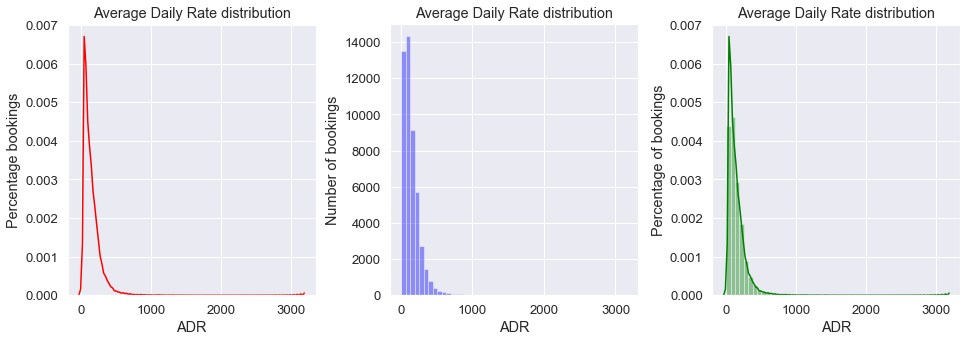

In [20]:
###############################################################################
# 2. plot the distribution of ADR_USD variable
###############################################################################

sns.set(style='dark')
sns.set(font_scale=1.2)

f, axes = plt.subplots(1,3, figsize=(16,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

ax1 = sns.distplot(all_city['ADR_USD'], kde=True, hist=False,color='Red', ax=axes[0])
ax1.set_title('Average Daily Rate distribution')
ax1.set_xlabel('ADR')
ax1.set_ylabel('Percentage bookings')

ax2 = sns.distplot(all_city['ADR_USD'], kde=False, hist=True, color='Blue', ax=axes[1])
ax2.set_title('Average Daily Rate distribution')
ax2.set_xlabel('ADR')
ax2.set_ylabel('Number of bookings')

ax3 = sns.distplot(all_city['ADR_USD'], kde=True, hist=True, color='Green', ax=axes[2])
ax3.set_title('Average Daily Rate distribution')
ax3.set_xlabel('ADR')
ax3.set_ylabel('Percentage of bookings')

Covariance matrix between ADR_USD and bc_gap :
Element(0,0) : variance of 1st array
Element(0,1) : co-variance of 1st and 2nd array
Element(1,0) : co-variance of 2nd and 1st array
Element(0,0) : variance of 2nd array
*******************************************
[[18316.52294548   239.65535275]
 [  239.65535275   245.88270966]]


Covariance matrix between ADR_USD and bc_gap using pandas cov function :
*******************************************
              ADR_USD      bc_gap
ADR_USD  18316.522945  239.655353
bc_gap     239.655353  245.882710


Correlation coefficient matrix between ADR_USD and bc_gap :
Element(0,0) : correlation of 1st array with itself
Element(0,1) : correlation of 1st and 2nd array
Element(1,0) : correlation of 2nd and 1st array
Element(0,0) : correlation of 2nd array with itself
*******************************************
[[1.       0.112928]
 [0.112928 1.      ]]


Correlation coefficient matrix between ADR_USD and bc_gap using pandas corr function :
*************

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

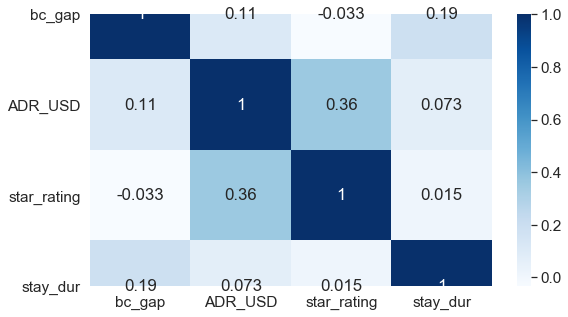

In [21]:
###############################################################################
# 3. Get the relation between two numeric variables
# covariance & correleation coefficient
###############################################################################

print('Covariance matrix between ADR_USD and bc_gap :')
print('Element(0,0) : variance of 1st array')
print('Element(0,1) : co-variance of 1st and 2nd array')
print('Element(1,0) : co-variance of 2nd and 1st array')
print('Element(0,0) : variance of 2nd array')
print('*******************************************')
print(np.cov(all_city['ADR_USD'], all_city['bc_gap']))

print('\n')

print('Covariance matrix between ADR_USD and bc_gap using pandas cov function :')
print('*******************************************')
print(all_city[['ADR_USD','bc_gap']].cov())

print('\n')

print('Correlation coefficient matrix between ADR_USD and bc_gap :')
print('Element(0,0) : correlation of 1st array with itself')
print('Element(0,1) : correlation of 1st and 2nd array')
print('Element(1,0) : correlation of 2nd and 1st array')
print('Element(0,0) : correlation of 2nd array with itself')
print('*******************************************')
print(np.corrcoef(all_city['ADR_USD'], all_city['bc_gap']))

print('\n')

print('Correlation coefficient matrix between ADR_USD and bc_gap using pandas corr function :')
print('*******************************************')
print(all_city[['ADR_USD','bc_gap']].corr())

print('\n')

print('Correlation coefficient matrix heatmap using pandas corr function :')
print('*******************************************')
corr = all_city[['bc_gap', 'ADR_USD', 'star_rating', 'stay_dur']].corr()

sns.set(style='darkgrid', font_scale=1.4)

f, ax = plt.subplots(figsize=(9, 5))

ax1 = sns.heatmap(corr, annot=True, cmap = 'Blues')

plt.yticks(rotation=0)

In [24]:
###############################################################################
# 4. Sampling of data
###############################################################################

# Simple random sampling : we can do smapling using pandas inbuild sampling function

training_data = all_city.sample(frac=0.8, random_state=123, replace=False)
test_data = all_city[~all_city.index.isin(training_data.index)]

print('Original dataset size :',all_city.shape[0], 'Training size :', training_data.shape[0], \
      'Test size :',test_data.shape[0])

Original dataset size : 49064 Training size : 39251 Test size : 9813


In [34]:
# Stratified sampling using one of the variables for the strata - accommodation type

print('Size of original dataset by this strata:')
print('*******************************************')

print(all_city.groupby(by='acc_name').agg({'book_id':'count'}).sort_values(by='book_id',ascending=False))

print('\n')

print('Size of sampled dataset by this strata:')
print('*******************************************')

acc_samp = all_city.groupby(by='acc_name',as_index=False).apply(lambda x: x.sample(frac=0.1, random_state=123))
print(acc_samp.groupby(by='acc_name').agg({'book_id':'count'}).sort_values(by='book_id',ascending=False))

Size of original dataset by this strata:
*******************************************
                               book_id
acc_name                              
Hotel                            35441
Resort                            3525
Serviced Apartment                2797
Hostel                            2774
Guest House / Bed & Breakfast     2758
Capsule Hotel                      822
Resort Villa                       397
Apartment                          239
Bungalow                           142
Ryokan                             103
Motel                               27
Private Villa                       18
Home                                14
Holiday Park / Caravan Park          3
Love Hotel                           3
Villa                                1


Size of sampled dataset by this strata:
*******************************************
                               book_id
acc_name                              
Hotel                             3544
Resort    

### II. Generating probability distribution functions and plotting them

 - poisson distribution
 - uniform distribution
 - beta distribution
 - gamma distribution
     - exponential distribution
     - chi square distribution
 - Normal distribution
 - lognormal distribution
 - Wald / inverse gaussian distribution
 - logistic distribution
 - t distribution
 - f distribution

Text(0.5, 1.0, 'Chi-Square distributions')

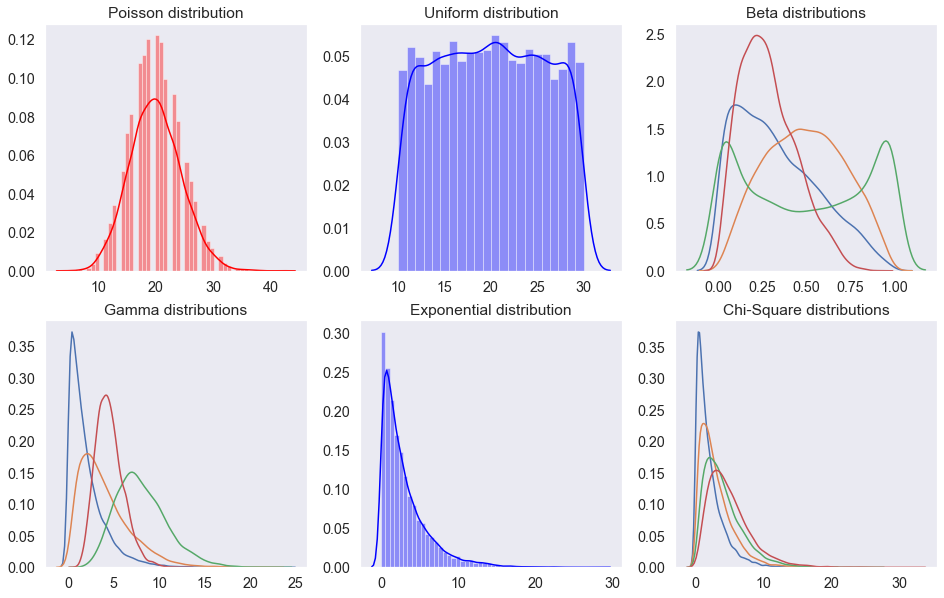

In [59]:
poi = np.random.poisson(lam=20, size=10000)

uni = np.random.uniform(10, 30, size=10000)

beta_12 = np.random.beta(1,2, size=10000)
beta_22 = np.random.beta(2,2, size=10000)
beta_05 = np.random.beta(0.5,0.5, size=10000)
beta_25 = np.random.beta(2,5, size=10000)

gamma_12 = np.random.gamma(1,2, size=10000)
gamma_22 = np.random.gamma(2,2, size=10000)
gamma_051 = np.random.gamma(0.5,1, size=10000)
gamma_81 = np.random.gamma(8,1, size=10000)
gamma_905 = np.random.gamma(9,0.5, size=10000)

exp = np.random.exponential(3, size=10000)

chis_1 = np.random.chisquare(1, size=10000)
chis_2 = np.random.chisquare(2, size=10000)
chis_3 = np.random.chisquare(3, size=10000)
chis_4 = np.random.chisquare(4, size=10000)
chis_5 = np.random.chisquare(5, size=10000)

sns.set(style='dark', font_scale=1.3)
f,axes = plt.subplots(2,3,figsize=(16,10))

ax1=sns.distplot(poi, kde=True, color='Red',ax=axes[0,0])
ax1.set_title('Poisson distribution')

ax2=sns.distplot(uni, kde=True, color='Blue',ax=axes[0,1])
ax2.set_title('Uniform distribution')

ax3=sns.distplot(beta_12, hist=False, ax=axes[0,2])
ax3=sns.distplot(beta_22, hist=False, ax=axes[0,2])
ax3=sns.distplot(beta_05, hist=False, ax=axes[0,2])
ax3=sns.distplot(beta_25, hist=False, ax=axes[0,2])
ax3.set_title('Beta distributions')

ax4=sns.distplot(gamma_12, hist=False, ax=axes[1,0])
ax4=sns.distplot(gamma_22, hist=False, ax=axes[1,0])
#ax4=sns.distplot(gamma_051, hist=False, ax=axes[1,0])
ax4=sns.distplot(gamma_81, hist=False, ax=axes[1,0])
ax4=sns.distplot(gamma_905, hist=False, ax=axes[1,0])
ax4.set_title('Gamma distributions')

ax5=sns.distplot(exp, kde=True, color='Blue',ax=axes[1,1])
ax5.set_title('Exponential distribution')

#ax6=sns.distplot(chis_1, hist=False, ax=axes[1,2])
ax6=sns.distplot(chis_2, hist=False, ax=axes[1,2])
ax6=sns.distplot(chis_3, hist=False, ax=axes[1,2])
ax6=sns.distplot(chis_4, hist=False, ax=axes[1,2])
ax6=sns.distplot(chis_5, hist=False, ax=axes[1,2])
ax6.set_title('Chi-Square distributions')

Text(0.5, 1.0, 'F distribution')

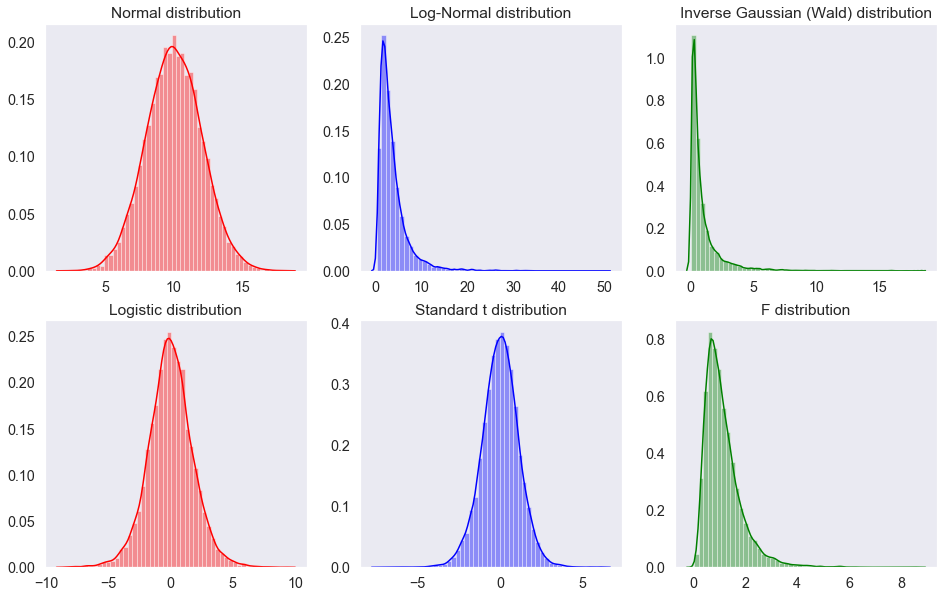

In [82]:
norm = np.random.normal(10, 2, size=10000)

lognorm = np.random.lognormal(1, 0.75, size=10000)

wald = np.random.wald(1, 0.5, size=10000)

logis = np.random.logistic(0,1,size=10000)

tdist = np.random.standard_t(df=10, size=10000)

fdist = np.random.f(dfnum=10, dfden=15, size=10000)

sns.set(style='dark', font_scale=1.3)
f,axes = plt.subplots(2,3,figsize=(16,10))

ax1=sns.distplot(norm, kde=True, color='Red',ax=axes[0,0])
ax1.set_title('Normal distribution')

ax2=sns.distplot(lognorm, kde=True, color='Blue',ax=axes[0,1])
ax2.set_title('Log-Normal distribution')

ax3=sns.distplot(wald, kde=True, color='Green',ax=axes[0,2])
ax3.set_title('Inverse Gaussian (Wald) distribution')

ax4=sns.distplot(logis, kde=True, color='Red',ax=axes[1,0])
ax4.set_title('Logistic distribution')

ax5=sns.distplot(tdist, kde=True, color='Blue',ax=axes[1,1])
ax5.set_title('Standard t distribution')

ax6=sns.distplot(fdist, kde=True, color='Green',ax=axes[1,2])
ax6.set_title('F distribution')